In [1]:
#Initial imports
import sqlite3 as sql
import pandas as pd
import numpy as np

In [2]:
#Setup
database = "C:\\Users\\Nabiha Naqvie\\Documents\\SANA Project\\SANA.db"
connection = sql.connect(database)
cursor = connection.cursor()
cursor.execute("SELECT * FROM SANA")
results = cursor.fetchall()

In [3]:
sana = pd.read_sql_query("Select * FROM SANA", connection)
sana

,Title,Author,Category,Sub-Category,Language,External Links,Book/Paper,Abstract
0,Title of the paper,Author,Category,Tags/ Sub-category,Language,External link,Book/paper,Abstract
1,"Methods and Perspectives in Islamic Sciences, ...",Ali Paya,Islamic Philosophy,Islamic Studies/ Methodology and Methods in Is...,English,https://www.islamic-college.ac.uk/about/academ...,Book,None
2,"Ethics, Epistemology, and Religion: Further Th...",Ali Paya,Islamic Philosophy,Ethics/ Epistemology/Religion/Islam,English,https://www.routledge.com/search?kw=Ethics%2C+...,Book,None
3,Analytic Philosophy: Problems and Perspectives...,Ali Paya,Islamic Philosophy,Analytical Philosophy,Persian,https://www.islamic-college.ac.uk/about/academ...,Book,None
4,"On Religious Knowledge (Dar Bareh Ilm-e Dini),...",Ali Paya,Islamic Philosophy,Islamic Sciences/ Religious Knowledge,Persian,https://www.islamic-college.ac.uk/about/academ...,Book,None
...,...,...,...,...,...,...,...,...
637,The Origins and Rhetorical Evolution of the Te...,Shahzad Bashir,Anthropology of Shi’a Islam,historiography/Islamic history/qizilbash/Safav...,English,https://brill.com/view/journals/jesh/57/3/arti...,paper,This essay traces the use of the term Qizilb?s...
638,"Bashir, Shahzad Shah Ismaʿil and the Qizilbash...",Shahzad Bashir,Anthropology of Shi’a Islam,historiography/Islamic history/qizilbash/Safav...,English,https://www.journals.uchicago.edu/doi/10.1086/...,paper,The first decade of the sixteeth century of th...
639,The Iranian Metaphysicals: Explorations in Sci...,Alireza Doostdar,Anthropology of Shi’a Islam,science/spirituality/mysticism/rationality/met...,English,https://www-jstor-org.proxygw.wrlc.org/stable/...,paper,None
640,Varieties of Islamic Social Science KNOW: A Jo...,Alireza Doostdar,Anthropology of Shi’a Islam,social science/integration in Islam/Islamizati...,English,https://web-a-ebscohost-com.proxygw.wrlc.org/e...,paper,None


In [4]:
#Drop the unneccary columns 
sana = sana.drop([0])
sana.drop(['Author', 'Language', 'Book/Paper', 'External Links'], axis=1, inplace = True)
#Drop the rows with No abstract 
sana = sana.replace(to_replace='None', value=np.nan).dropna()

# Pre-Processing the Text 
## Cleaning, Tokenizing and Lemmatizing 
#### Includes creating binary values for category 

In [5]:
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\Nabiha
[nltk_data]     Naqvie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Nabiha Naqvie\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\Nabiha
[nltk_data]     Naqvie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
#Create a function for pre-processing the important columns  
def preprocess(text):
    text = text.lower() #lowercase text
    text = text.strip()  #remove whitespace 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text) #Replace punctuation with space
    text = re.sub('\s+', ' ', text) #Remove extra space and tabs
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    return text

In [7]:
#Apply the function to each column 
#sana['Sub-Category'] = sana['Sub-Category'].apply(preprocess)
#sana['Abstract'] = sana['Abstract'].apply(preprocess)
#sana['Title'] = sana['Title'].apply(preprocess)
sana['Category'] = sana['Category'].apply(preprocess)

In [8]:
#Create function for stop words
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

In [9]:
#Apply the function for stop words to each column 
sana['Category'] = sana['Category'].apply(stopword)
sana['Title'] = sana['Title'].apply(stopword)
sana['Sub-Category'] = sana['Sub-Category'].apply(stopword)
sana['Abstract'] = sana['Abstract'].apply(stopword)


In [10]:
#Create a function to tokenize all columns 
sana["AbstractToken"] = sana.apply(lambda row: word_tokenize(row["Abstract"]), axis=1)
sana["Sub-CategoryToken"] = sana.apply(lambda row: word_tokenize(row["Sub-Category"]), axis=1)
sana["TitleToken"] = sana.apply(lambda row: word_tokenize(row["Title"]), axis=1)

In [11]:
#Create a function to lemmatize all columns 
WNL = WordNetLemmatizer()
def lemmatize_text(text):
    return [WNL.lemmatize(w) for w in text]


In [12]:
#Apply the function for lemmatize to all columns 
sana["AbstractToken"] = sana['AbstractToken'].apply(lemmatize_text)
sana["AbstractL"] = sana['AbstractToken'].apply(' '.join)
sana["Sub-CategoryToken"] = sana['Sub-CategoryToken'].apply(lemmatize_text)
sana["Sub-CategoryL"] = sana['Sub-CategoryToken'].apply(' '.join)
sana["TitleToken"] = sana['TitleToken'].apply(lemmatize_text)
sana["TitleL"] = sana['TitleToken'].apply(' '.join)

In [13]:
#look at all the results 
sana

,Title,Category,Sub-Category,Abstract,AbstractToken,Sub-CategoryToken,TitleToken,AbstractL,Sub-CategoryL,TitleL
8,"Islam, Modernity New Millennium: Themes Critic...",islamic philosophy,Religious Studies/ Islamic Studies/Philosophy ...,As world becomes increasingly globalised Islam...,"[As, world, becomes, increasingly, globalised,...","[Religious, Studies/, Islamic, Studies/Philoso...","[Islam, ,, Modernity, New, Millennium, :, Them...",As world becomes increasingly globalised Islam...,Religious Studies/ Islamic Studies/Philosophy ...,"Islam , Modernity New Millennium : Themes Crit..."
12,Analytic Philosophy Perspective Critical Ratio...,islamic philosophy,Analytical Philosophy/ Critical Rationalism,The present paper attempt explore impact Karl ...,"[The, present, paper, attempt, explore, impact...","[Analytical, Philosophy/, Critical, Rationalism]","[Analytic, Philosophy, Perspective, Critical, ...",The present paper attempt explore impact Karl ...,Analytical Philosophy/ Critical Rationalism,Analytic Philosophy Perspective Critical Ratio...
15,The Misty Land Ideas Light Dialogue: An Anthol...,islamic philosophy,Islamic philosophy/ Philosophy/ Comparative,"Comparative philosophy, like types philosophy,...","[Comparative, philosophy, ,, like, type, philo...","[Islamic, philosophy/, Philosophy/, Comparative]","[The, Misty, Land, Ideas, Light, Dialogue, :, ...","Comparative philosophy , like type philosophy ...",Islamic philosophy/ Philosophy/ Comparative,The Misty Land Ideas Light Dialogue : An Antho...
16,Socio-Ethical Consequences Convergent Technolo...,islamic philosophy,Socio- Ethical Consequences/ Converging Scienc...,Critical assessment social changes impact fact...,"[Critical, assessment, social, change, impact,...","[Socio-, Ethical, Consequences/, Converging, S...","[Socio-Ethical, Consequences, Convergent, Tech...",Critical assessment social change impact facto...,Socio- Ethical Consequences/ Converging Scienc...,Socio-Ethical Consequences Convergent Technolo...
29,"“Shi‘as Britain: The Earliest Cases (Part 1)”,...",islamic philosophy,Shi'a Muslim/Counterflows Colonialism/The East...,"Shi�a Muslims UK, whether individually groups ...","[Shi�a, Muslims, UK, ,, whether, individually,...","[Shi, ', a, Muslim/Counterflows, Colonialism/T...","[“, Shi, ‘, a, Britain, :, The, Earliest, Case...","Shi�a Muslims UK , whether individually group ...",Shi ' a Muslim/Counterflows Colonialism/The Ea...,“ Shi ‘ a Britain : The Earliest Cases ( Part ...
...,...,...,...,...,...,...,...,...,...,...
635,"Bashir, Shahzad Reading self Persian prose poe...",anthropology shia islam,Sufism/Persian poetry/historiography/17th cent...,Let us start thought experiment. Five hundred ...,"[Let, u, start, thought, experiment, ., Five, ...","[Sufism/Persian, poetry/historiography/17th, c...","[Bashir, ,, Shahzad, Reading, self, Persian, p...",Let u start thought experiment . Five hundred ...,Sufism/Persian poetry/historiography/17th cent...,"Bashir , Shahzad Reading self Persian prose po..."
636,Everlasting Doubt: Uncertainty Islamic Represe...,anthropology shia islam,historiography/Islamic history/Persian Arabic ...,Utilizing treatments uncertainty regarding his...,"[Utilizing, treatment, uncertainty, regarding,...","[historiography/Islamic, history/Persian, Arab...","[Everlasting, Doubt, :, Uncertainty, Islamic, ...",Utilizing treatment uncertainty regarding hist...,historiography/Islamic history/Persian Arabic ...,Everlasting Doubt : Uncertainty Islamic Repres...
637,The Origins Rhetorical Evolution Term Qizilbās...,anthropology shia islam,historiography/Islamic history/qizilbash/Safav...,This essay traces use term Qizilb?sh select li...,"[This, essay, trace, use, term, Qizilb, ?, sh,...","[historiography/Islamic, history/qizilbash/Saf...","[The, Origins, Rhetorical, Evolution, Term, Qi...",This essay trace use term Qizilb ? sh select l...,historiography/Islamic history/qizilbash/Safav...,The Origins Rhetorical Evolution Term Qizilbās...
638,"Bashir

In [14]:
#Drop the unneccasary columns
sana.drop(['AbstractToken', 'Sub-CategoryToken', 'TitleToken'], axis=1, inplace = True)
sana

,Title,Category,Sub-Category,Abstract,AbstractL,Sub-CategoryL,TitleL
8,"Islam, Modernity New Millennium: Themes Critic...",islamic philosophy,Religious Studies/ Islamic Studies/Philosophy ...,As world becomes increasingly globalised Islam...,As world becomes increasingly globalised Islam...,Religious Studies/ Islamic Studies/Philosophy ...,"Islam , Modernity New Millennium : Themes Crit..."
12,Analytic Philosophy Perspective Critical Ratio...,islamic philosophy,Analytical Philosophy/ Critical Rationalism,The present paper attempt explore impact Karl ...,The present paper attempt explore impact Karl ...,Analytical Philosophy/ Critical Rationalism,Analytic Philosophy Perspective Critical Ratio...
15,The Misty Land Ideas Light Dialogue: An Anthol...,islamic philosophy,Islamic philosophy/ Philosophy/ Comparative,"Comparative philosophy, like types philosophy,...","Comparative philosophy , like type philosophy ...",Islamic philosophy/ Philosophy/ Comparative,The Misty Land Ideas Light Dialogue : An Antho...
16,Socio-Ethical Consequences Convergent Technolo...,islamic philosophy,Socio- Ethical Consequences/ Converging Scienc...,Critical assessment social changes impact fact...,Critical assessment social change impact facto...,Socio- Ethical Consequences/ Converging Scienc...,Socio-Ethical Consequences Convergent Technolo...
29,"“Shi‘as Britain: The Earliest Cases (Part 1)”,...",islamic philosophy,Shi'a Muslim/Counterflows Colonialism/The East...,"Shi�a Muslims UK, whether individually groups ...","Shi�a Muslims UK , whether individually group ...",Shi ' a Muslim/Counterflows Colonialism/The Ea...,“ Shi ‘ a Britain : The Earliest Cases ( Part ...
...,...,...,...,...,...,...,...
635,"Bashir, Shahzad Reading self Persian prose poe...",anthropology shia islam,Sufism/Persian poetry/historiography/17th cent...,Let us start thought experiment. Five hundred ...,Let u start thought experiment . Five hundred ...,Sufism/Persian poetry/historiography/17th cent...,"Bashir , Shahzad Reading self Persian prose po..."
636,Everlasting Doubt: Uncertainty Islamic Represe...,anthropology shia islam,historiography/Islamic history/Persian Arabic ...,Utilizing treatments uncertainty regarding his...,Utilizing treatment uncertainty regarding hist...,historiography/Islamic history/Persian Arabic ...,Everlasting Doubt : Uncertainty Islamic Repres...
637,The Origins Rhetorical Evolution Term Qizilbās...,anthropology shia islam,historiography/Islamic history/qizilbash/Safav...,This essay traces use term Qizilb?sh select li...,This essay trace use term Qizilb ? sh select l...,historiography/Islamic history/qizilbash/Safav...,The Origins Rhetorical Evolution Term Qizilbās...
638,"Bashir, Shahzad Shah Ismaʿil Qizilbash: Cannib...",anthropology shia islam,historiography/Islamic history/qizilbash/Safav...,The first decade sixteeth century Common Era s...,The first decade sixteeth century Common Era s...,historiography/Islamic history/qizilbash/Safav...,"Bashir , Shahzad Shah Ismaʿil Qizilbash : Cann..."


In [15]:
#Reset the indexes 
sana.reset_index(inplace = True)
sana.drop(['index'], axis=1, inplace = True)

In [16]:
#Create numerical column for category 
sana['Category'].value_counts()
category = {"anthropology shia islam": 0, 'islamic philosophy': 1}
sana['Category'] = [category[item] for item in sana['Category']]
sana

,Title,Category,Sub-Category,Abstract,AbstractL,Sub-CategoryL,TitleL
0,"Islam, Modernity New Millennium: Themes Critic...",1,Religious Studies/ Islamic Studies/Philosophy ...,As world becomes increasingly globalised Islam...,As world becomes increasingly globalised Islam...,Religious Studies/ Islamic Studies/Philosophy ...,"Islam , Modernity New Millennium : Themes Crit..."
1,Analytic Philosophy Perspective Critical Ratio...,1,Analytical Philosophy/ Critical Rationalism,The present paper attempt explore impact Karl ...,The present paper attempt explore impact Karl ...,Analytical Philosophy/ Critical Rationalism,Analytic Philosophy Perspective Critical Ratio...
2,The Misty Land Ideas Light Dialogue: An Anthol...,1,Islamic philosophy/ Philosophy/ Comparative,"Comparative philosophy, like types philosophy,...","Comparative philosophy , like type philosophy ...",Islamic philosophy/ Philosophy/ Comparative,The Misty Land Ideas Light Dialogue : An Antho...
3,Socio-Ethical Consequences Convergent Technolo...,1,Socio- Ethical Consequences/ Converging Scienc...,Critical assessment social changes impact fact...,Critical assessment social change impact facto...,Socio- Ethical Consequences/ Converging Scienc...,Socio-Ethical Consequences Convergent Technolo...
4,"“Shi‘as Britain: The Earliest Cases (Part 1)”,...",1,Shi'a Muslim/Counterflows Colonialism/The East...,"Shi�a Muslims UK, whether individually groups ...","Shi�a Muslims UK , whether individually group ...",Shi ' a Muslim/Counterflows Colonialism/The Ea...,“ Shi ‘ a Britain : The Earliest Cases ( Part ...
...,...,...,...,...,...,...,...
193,"Bashir, Shahzad Reading self Persian prose poe...",0,Sufism/Persian poetry/historiography/17th cent...,Let us start thought experiment. Five hundred ...,Let u start thought experiment . Five hundred ...,Sufism/Persian poetry/historiography/17th cent...,"Bashir , Shahzad Reading self Persian prose po..."
194,Everlasting Doubt: Uncertainty Islamic Represe...,0,historiography/Islamic history/Persian Arabic ...,Utilizing treatments uncertainty regarding his...,Utilizing treatment uncertainty regarding hist...,historiography/Islamic history/Persian Arabic ...,Everlasting Doubt : Uncertainty Islamic Repres...
195,The Origins Rhetorical Evolution Term Qizilbās...,0,historiography/Islamic history/qizilbash/Safav...,This essay traces use term Qizilb?sh select li...,This essay trace use term Qizilb ? sh select l...,historiography/Islamic history/qizilbash/Safav...,The Origins Rhetorical Evolution Term Qizilbās...
196,"Bashir, Shahzad Shah Ismaʿil Qizilbash: Cannib...",0,historiography/Islamic history/qizilbash/Safav...,The first decade sixteeth century Common Era s...,The first decade sixteeth century Common Era s...,historiography/Islamic history/qizilbash/Safav...,"Bashir , Shahzad Shah Ismaʿil Qizilbash : Cann..."


In [17]:
with pd.option_context('display.max_colwidth', None):
  display(sana)

,Title,Category,Sub-Category,Abstract,AbstractL,Sub-CategoryL,TitleL
0,"Islam, Modernity New Millennium: Themes Critical Rationalist Reading Islam, London & New York: Routledge, 2018.",1,Religious Studies/ Islamic Studies/Philosophy Religion/Karl Popper’s theory critical rationalism,"As world becomes increasingly globalised Islam faces important choices. Does seek ""modernise"" line cultures practised, retain traditions even odds surrounding society? This book utilizes critical rationalist viewpoint illuminate many hotly contended issues modern Islam, offer fresh analysis. A variety issues within Islam discussed book including, Muslims modernity; Islam, Christianity Judaism; approaches understanding Quran; Muslim identity civil society; doctrinal certainty violent radicalism. In case, author makes use Karl Popper�s theory critical rationalism uncover new aspects issues challenge post-modern, relativist, literalist justificationist readings Islam.This unique perspective contemporary Islam significant interest scholars Religious Studies, Islamic Studies Philosophy Religion.","As world becomes increasingly globalised Islam face important choice . Does seek `` modernise '' line culture practised , retain tradition even odds surrounding society ? This book utilizes critical rationalist viewpoint illuminate many hotly contended issue modern Islam , offer fresh analysis . A variety issue within Islam discussed book including , Muslims modernity ; Islam , Christianity Judaism ; approach understanding Quran ; Muslim identity civil society ; doctrinal certainty violent radicalism . In case , author make use Karl Popper�s theory critical rationalism uncover new aspect issue challenge post-modern , relativist , literalist justificationist reading Islam.This unique perspective contemporary Islam significant interest scholar Religious Studies , Islamic Studies Philosophy Religion .",Religious Studies/ Islamic Studies/Philosophy Religion/Karl Popper ’ s theory critical rationalism,"Islam , Modernity New Millennium : Themes Critical Rationalist Reading Islam , London & New York : Routledge , 2018 ."
1,"Analytic Philosophy Perspective Critical Rationalism, Tehran: Tarh-e Naqd Publications, 2016. Habermas Iranian Intellectuals (with Mohammad Amin Ghaneirad), Tehran: Tarhe Naqd, 2016.",1,Analytical Philosophy/ Critical Rationalism,"The present paper attempt explore impact Karl Popper�s ideas views number intellectual groups post?revolutionary Iran. Throughout text, tried make use original sources personal experiences. The upshot arguments paper Viennese philosopher made long?lasting impression intellectual scene present?day Iran even socio?political groups favour ideas, especially model critical rationalism, felt urgent need make familiar them. Moreover, many Popper�s ideas directly indirectly influenced thinking decision?makers Iran since 1978.","The present paper attempt explore impact Karl Popper�s idea view number intellectual group post ? revolutionary Iran . Throughout text , tried make use original source personal experience . The upshot argument paper Viennese philosopher made long ? lasting impression intellectual scene present ? day Iran even socio ? political group favour idea , especially model critical rationalism , felt urgent need make familiar them . Moreover , many Popper�s idea directly indirectly influenced thinking decision ? maker Iran since 1978 .",Analytical Philosophy/ Critical Rationalism,"Analytic Philosophy Perspective Critical Rationalism , Tehran : Tarh-e Naqd Publications , 2016 . Habermas Iranian Intellectuals ( with Mohammad Amin Ghaneirad ) , Tehran : Tarhe Naqd , 2016 ."
2,"The Misty Land Ideas Light Dialogue: An Anthology Comparative Philosophy- Western & Islamic, edited by, Ali Paya, London: ICAS Press, 2014, second edition. Iraq, Democracy, Future Muslim World, edited Ali Paya & John Esposito, London & New York: Routledge, 2012.",1,Islamic philosophy/ Philosophy/ Comparative,"Comparative philosophy, like type

# Vectorizing Data 
#### Importing for ML 

In [18]:
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

###### CountVectorize

In [19]:
#Vectorize the Abstract 
#The results for counts.shape give a tuple that indicate 198 abstract that have 4974 unique words 
count_vect = CountVectorizer()
Xa_counts = count_vect.fit_transform(sana['AbstractL'])
print(Xa_counts.shape)
print(count_vect.get_feature_names())

(198, 5095)
['000', '100', '1000', '1010', '1021', '1088', '10th', '1111', '1164', '1171', '11th', '1210', '1274', '12th', '1334', '135', '1350', '1370', '1382', '1389', '1390', '1392', '1394', '1399', '13th', '14', '1405', '1406', '1409', '1413', '1414', '1418', '1423', '1426', '1432', '1433', '1447', '1449', '1454', '1460s', '1464', '1469', '1488', '1490', '14th', '150', '1501', '1502', '1512', '1518', '1520', '1524', '1534', '1540', '1566', '157', '1587', '1592', '15th', '16', '1626', '1629', '163', '1642', '1687', '16th', '1700', '175', '18', '1835', '1867', '1882', '1899', '19', '1903', '1909', '1940s', '1950s', '1955', '1960s', '1970s', '1975', '1976', '1978', '1979', '1980s', '1982', '1989', '1990s', '1991', '1992', '1993', '1995', '1996', '1997', '1998', '20', '200', '2003', '2005', '2006', '2007', '2009', '2010', '2011', '2013', '2016', '2017', '2018', '2025', '20th', '21', '22', '25', '25b', '28', '298', '2nd', '302', '32', '333', '334', '335', '336', '341', '401', '411', '48

D:\Anaconda 2\envs\SANA\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [20]:
#Putting the result above into the dataframe 
Xa_counts_df = pd.DataFrame(Xa_counts.toarray())
Xa_counts_df

,0,1,2,3,4,5,6,7,8,9,...,5085,5086,5087,5088,5089,5090,5091,5092,5093,5094
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#The results here show the same table as above except here it has columns names 
Xa_counts_df.columns = count_vect.get_feature_names()
Xa_counts_df

D:\Anaconda 2\envs\SANA\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,100,1000,1010,1021,1088,10th,1111,1164,1171,...,zahra,zana,zaydis,zaynab,zbek,zeal,zero,ziya,zo,zu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### N-Grams for TFIDF 

In [22]:
#Looking for 
ngram_vect = CountVectorizer(ngram_range = (3,3))
X_counts = ngram_vect.fit_transform(sana['AbstractL'])
print(X_counts)


  (0, 1337)	1
  (0, 16373)	1
  (0, 1783)	1
  (0, 6812)	1
  (0, 5762)	1
  (0, 7407)	1
  (0, 4993)	1
  (0, 6631)	1
  (0, 2418)	1
  (0, 4110)	1
  (0, 12933)	1
  (0, 9115)	1
  (0, 8318)	1
  (0, 3367)	1
  (0, 11106)	1
  (0, 12275)	1
  (0, 15242)	1
  (0, 4707)	1
  (0, 9875)	1
  (0, 14271)	1
  (0, 13666)	1
  (0, 14910)	1
  (0, 1923)	1
  (0, 15764)	1
  (0, 3281)	1
  :	:
  (197, 11306)	1
  (197, 12829)	1
  (197, 15758)	1
  (197, 3914)	1
  (197, 9260)	1
  (197, 13971)	1
  (197, 1058)	1
  (197, 1471)	1
  (197, 7802)	1
  (197, 11146)	1
  (197, 4102)	1
  (197, 14848)	1
  (197, 727)	1
  (197, 709)	1
  (197, 15576)	1
  (197, 12776)	1
  (197, 11046)	1
  (197, 9142)	1
  (197, 9176)	1
  (197, 14115)	1
  (197, 11864)	1
  (197, 12962)	1
  (197, 261)	1
  (197, 8424)	1
  (197, 3092)	1


In [23]:
X_counts_df = pd.DataFrame(X_counts.toarray())
X_counts_df.columns = ngram_vect.get_feature_names()
X_counts_df

D:\Anaconda 2\envs\SANA\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000 participant bahrain,100 000 participant,1000 1592 ce,1010 maw il,1021 powerful ruler,1088 after introducing,1088 renowned ism,10th century draw,10th century eventually,10th century missionary,...,zaynab the chapter,zaynab though sayyida,zaynab well analyze,zbek activity twelver,zbek khan golden,zeal individ uals,zero sum game,ziya battle standard,zo state exception,zu qarneyn work
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
#Applying TFIDF Vectorizer
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(sana['AbstractL'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

(198, 5095)
['000', '100', '1000', '1010', '1021', '1088', '10th', '1111', '1164', '1171', '11th', '1210', '1274', '12th', '1334', '135', '1350', '1370', '1382', '1389', '1390', '1392', '1394', '1399', '13th', '14', '1405', '1406', '1409', '1413', '1414', '1418', '1423', '1426', '1432', '1433', '1447', '1449', '1454', '1460s', '1464', '1469', '1488', '1490', '14th', '150', '1501', '1502', '1512', '1518', '1520', '1524', '1534', '1540', '1566', '157', '1587', '1592', '15th', '16', '1626', '1629', '163', '1642', '1687', '16th', '1700', '175', '18', '1835', '1867', '1882', '1899', '19', '1903', '1909', '1940s', '1950s', '1955', '1960s', '1970s', '1975', '1976', '1978', '1979', '1980s', '1982', '1989', '1990s', '1991', '1992', '1993', '1995', '1996', '1997', '1998', '20', '200', '2003', '2005', '2006', '2007', '2009', '2010', '2011', '2013', '2016', '2017', '2018', '2025', '20th', '21', '22', '25', '25b', '28', '298', '2nd', '302', '32', '333', '334', '335', '336', '341', '401', '411', '48

D:\Anaconda 2\envs\SANA\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [25]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vect.get_feature_names()
X_tfidf_df

,000,100,1000,1010,1021,1088,10th,1111,1164,1171,...,zahra,zana,zaydis,zaynab,zbek,zeal,zero,ziya,zo,zu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Feature Engineering: Feature Creation 

In [26]:
sanaC = sana[['TitleL','AbstractL']]
sana['AbstractL_len'] = sana['AbstractL'].apply(lambda x : len(x) - x.count(" "))
sana['AbstractL_len']

0      696
1      450
2      562
3      829
4      942
      ... 
193    765
194    674
195    407
196    323
197    583
Name: AbstractL_len, Length: 198, dtype: int64

In [27]:
sana['TitleL_len'] = sana['TitleL'].apply(lambda x : len(x) - x.count(" "))
sana['TitleL_len']

0       97
1      162
2      223
3      128
4      181
      ... 
193    112
194    130
195    152
196    131
197     96
Name: TitleL_len, Length: 198, dtype: int64

#### Evaluate the created features

In [28]:
from matplotlib import pyplot 
import numpy as np
%matplotlib inline 

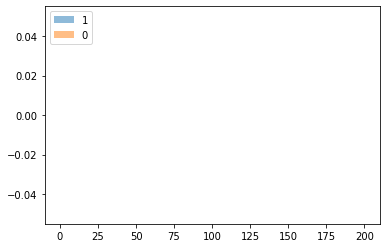

In [29]:
bins = np.linspace(0,200,40)
pyplot.hist(sana[sana['Category']=='1']['AbstractL_len'], bins, alpha = 0.5, label = '1')
pyplot.hist(sana[sana['Category']=='0']['AbstractL_len'], bins, alpha = 0.5, label = '0')
pyplot.legend(loc='upper left')
pyplot.show()

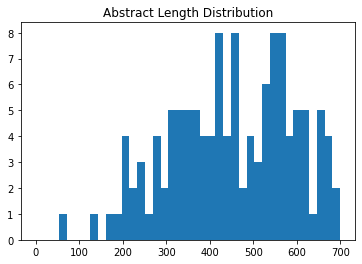

In [30]:
bins = np.linspace (0,700,40)
pyplot.hist(sana['AbstractL_len'],bins)
pyplot.title("Abstract Length Distribution")
pyplot.show()

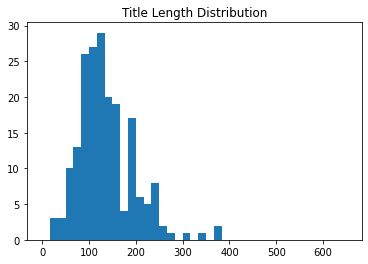

In [31]:
bins = np.linspace (0,650,40)
pyplot.hist(sana['TitleL_len'],bins)
pyplot.title("Title Length Distribution")
pyplot.show()

### Machine Learning Classifiers 

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

###### Abstract

In [33]:
#Create the vectore form 
tdfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(sana['AbstractL'])

X_features = pd.concat([sana['AbstractL_len'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

#Apply the RDF Classifier 
rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)

cross_val_score(rf,X_features, sana['Category'], cv=k_fold, scoring='accuracy', n_jobs=-1)


array([0.   , 0.425, 1.   , 1.   , 1.   ])

In [37]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_features, sana['Category'])
rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

D:\Anaconda 2\envs\SANA\lib\site-packages\sklearn\utils\validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [39]:
sorted(zip(rf_model.feature_importances_,X_train.columns), reverse= True)[0:10]

[(0.04545696202665166, 3341),
 (0.017211924209996978, 4209),
 (0.017146944659435386, 2399),
 (0.016874001365951637, 4938),
 (0.015812739349219385, 4101),
 (0.01535053511767938, 1139),
 (0.015050707561433922, 4860),
 (0.012467425358615183, 3878),
 (0.012129006047015087, 3441),
 (0.010324250735023039, 2974)]

In [40]:
y_pred = rf_model.predict(X_test)
precision,recall,fscore,support=score(y_test,y_pred,pos_label = 1, average='binary')

D:\Anaconda 2\envs\SANA\lib\site-packages\sklearn\utils\validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [41]:
import math
print('Precision:{}/Recall:{}/Accuracy:{}'.format(round(precision,3), round(recall,3), round((y_pred==y_test).sum() / len(y_pred),3)))

Precision:1.0/Recall:0.444/Accuracy:0.9


###### Title

In [42]:
#Create the vectore form 
tdfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(sana['TitleL'])

X_features = pd.concat([sana['TitleL_len'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

#Apply the RDF Classifier 
rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)

cross_val_score(rf,X_features, sana['Category'], cv=k_fold, scoring='accuracy', n_jobs=-1)

array([0.   , 0.425, 1.   , 1.   , 1.   ])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_features, sana['Category'])
rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

D:\Anaconda 2\envs\SANA\lib\site-packages\sklearn\utils\validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [44]:
y_pred = rf_model.predict(X_test)
precision,recall,fscore,support=score(y_test,y_pred,pos_label = 1, average='binary')

D:\Anaconda 2\envs\SANA\lib\site-packages\sklearn\utils\validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [45]:
print('Precision:{}/Recall:{}/Accuracy:{}'.format(round(precision,3), round(recall,3), round((y_pred==y_test).sum() / len(y_pred),3)))

Precision:1.0/Recall:0.412/Accuracy:0.8


#### Doc2Vec Approach 

In [46]:
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn import linear_model
#Split into 80/20 train and test 
X = sana['AbstractL']
Y = sana['Category']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)


def label_reviews(review, label_type):
    labeled = []
    for i,v in enumerate(review):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v.split(), [label]))
    return labeled

#Label training and test sets using function
X_train = label_reviews(X_train, 'Train')
X_test = label_reviews(X_test,'Test')
AllData = X_train + X_test

#Build Doc2Vec model
DBOWModel = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
DBOWModel.build_vocab([x for x in AllData])

#Iterate over data to train model
for epoch in range(30):
    DBOWModel.train(utils.shuffle([x for x in AllData]), total_examples=len(AllData), epochs=1)
    DBOWModel.alpha -= 0.002
    DBOWModel.min_alpha = DBOWModel.alpha

def get_vectors(model, corpus_size, vectors_size, vectors_type):
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors
#Vectorize training and testing data
train_vectors_dbow = get_vectors(DBOWModel, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(DBOWModel, len(X_test), 300, 'Test')

#Run multinomial logistic regression
#Run binary logistic regression
LR = linear_model.LogisticRegression(solver='lbfgs',max_iter=10000)
LR = LR.fit(train_vectors_dbow, Y_train)

D:\Anaconda 2\envs\SANA\lib\site-packages\ipykernel_launcher.py:37: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).


Doc2Vec Binary Class Balance



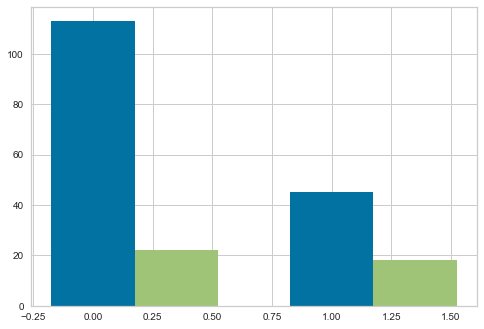

Binary Logistic Model Score for Doc2Vec: 82.5 % 



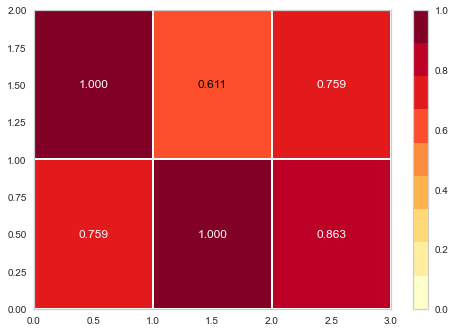

In [47]:
from yellowbrick.target import ClassBalance
import matplotlib.pyplot as plt
from yellowbrick.classifier import ClassificationReport

#Class Balance Visualization
CB = ClassBalance()
CB.fit(Y_train, Y_test)
print('Doc2Vec Binary Class Balance\n')
plt.show()

#Classification Report and overall score for Logistics Regression
LRScore = round((LR.score(test_vectors_dbow, Y_test))*100,2)
print('Binary Logistic Model Score for Doc2Vec:',LRScore,'%','\n')
LRC = ClassificationReport(LR, support=False)
LRC.fit(train_vectors_dbow, Y_train)      
LRC.score(test_vectors_dbow, Y_test)
plt.show() 

In [48]:
X = sana['TitleL']
Y = sana['Category']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)


def label_reviews(review, label_type):
    labeled = []
    for i,v in enumerate(review):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v.split(), [label]))
    return labeled

#Label training and test sets using function
X_train = label_reviews(X_train, 'Train')
X_test = label_reviews(X_test,'Test')
AllData = X_train + X_test

#Build Doc2Vec model
DBOWModel = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
DBOWModel.build_vocab([x for x in AllData])

#Iterate over data to train model
for epoch in range(30):
    DBOWModel.train(utils.shuffle([x for x in AllData]), total_examples=len(AllData), epochs=1)
    DBOWModel.alpha -= 0.002
    DBOWModel.min_alpha = DBOWModel.alpha

def get_vectors(model, corpus_size, vectors_size, vectors_type):
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors
#Vectorize training and testing data
train_vectors_dbow = get_vectors(DBOWModel, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(DBOWModel, len(X_test), 300, 'Test')

#Run multinomial logistic regression
#Run binary logistic regression
LR = linear_model.LogisticRegression(solver='lbfgs',max_iter=10000)
LR = LR.fit(train_vectors_dbow, Y_train)

D:\Anaconda 2\envs\SANA\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).


Doc2Vec Binary Class Balance



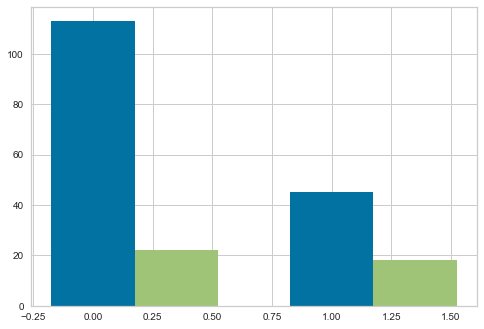

Binary Logistic Model Score for Doc2Vec: 92.5 % 



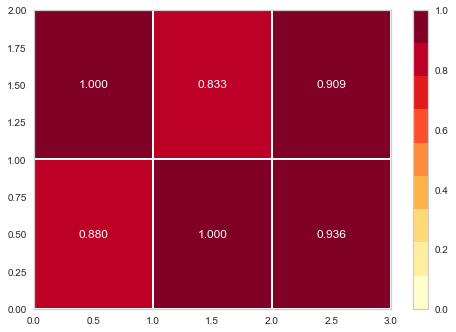

In [49]:
#Class Balance Visualization
CB = ClassBalance()
CB.fit(Y_train, Y_test)
print('Doc2Vec Binary Class Balance\n')
plt.show()

#Classification Report and overall score for Logistics Regression
LRScore = round((LR.score(test_vectors_dbow, Y_test))*100,2)
print('Binary Logistic Model Score for Doc2Vec:',LRScore,'%','\n')
LRC = ClassificationReport(LR, support=False)
LRC.fit(train_vectors_dbow, Y_train)      
LRC.score(test_vectors_dbow, Y_test)
plt.show()

#### Recurrent Neural Networks 

In [50]:
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences 

In [51]:
#Fit the tokenize 
from sklearn.model_selection import train_test_split
text = sana['AbstractL']
label = sana['Category']
X_train, X_test, y_train, y_test = train_test_split(text,
                                                    label)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [52]:
#Train and Test split 
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [53]:
X_train_seq_padded = pad_sequences(X_train_seq, 200)
X_test_seq_padded = pad_sequences(X_test_seq, 200)

In [54]:
import keras.backend as K
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

In [55]:
#Creating the model
#dropout helps with overfitting 
model = Sequential()
model.add(Embedding(len(tokenizer.index_word)+1, 100))
model.add(LSTM(100,dropout=0, recurrent_dropout=0))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         442700    
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 533,301
Trainable params: 533,301
Non-trainable params: 0
_________________________________________________________________


In [56]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', precision_m, recall_m])

In [57]:
# Fit the RNN model
history = model.fit(X_train_seq_padded, y_train, 
                    batch_size=100, epochs=10,
                    validation_data=(X_test_seq_padded, y_test))

Epoch 1/10
2/2 [==============================] - 2s 557ms/step - loss: 0.6916 - accuracy: 0.5811 - precision_m: 0.1364 - recall_m: 0.1452 - val_loss: 0.6878 - val_accuracy: 0.6800 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/10
2/2 [==============================] - 0s 185ms/step - loss: 0.6831 - accuracy: 0.6824 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.6808 - val_accuracy: 0.6800 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/10
2/2 [==============================] - 0s 180ms/step - loss: 0.6713 - accuracy: 0.6824 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.6695 - val_accuracy: 0.6800 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/10
2/2 [==============================] - 0s 183ms/step - loss: 0.6519 - accuracy: 0.6824 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.6490 - val_accuracy: 0.6800 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 5/10
2/2 [========

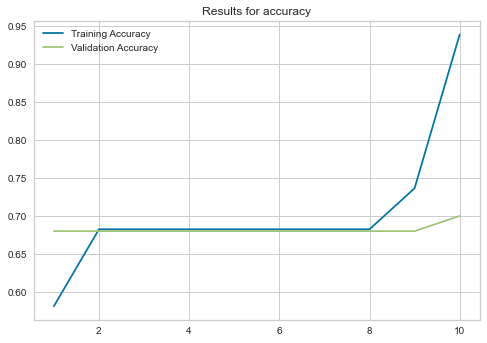

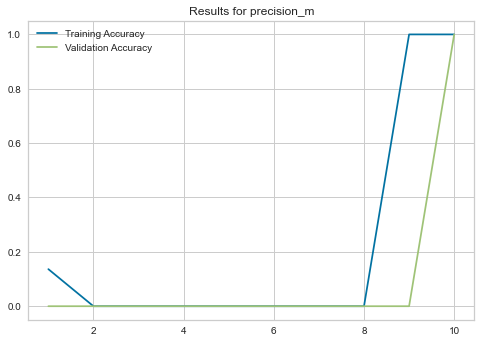

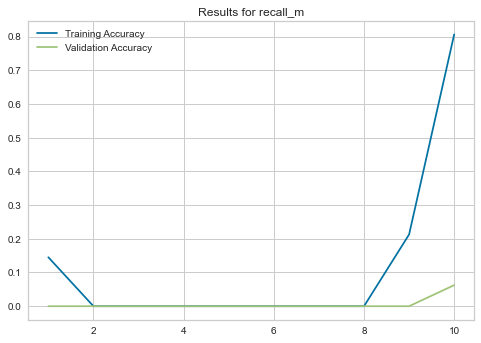

In [58]:
# Plot the evaluation metrics by each epoch for the model to see if we are over or underfitting
import matplotlib.pyplot as plt

for i in ['accuracy', 'precision_m', 'recall_m']:
    acc = history.history[i]
    val_acc = history.history['val_{}'.format(i)]
    epochs = range(1, len(acc) + 1)

    plt.figure()
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Results for {}'.format(i))
    plt.legend()
    plt.show()